In [5]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [3]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [6]:
gapminder %>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [9]:
factor(gapminder$continent)%>% levels

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania"

In [25]:
df.label =gapminder %>%
           filter(year %in% c('1952','2002')) %>%
           group_by(continent,year,country,gdpPercap) 
df.label

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,2002,42.129,25268405,726.7341
Albania,Europe,1952,55.230,1282697,1601.0561
Albania,Europe,2002,75.651,3508512,4604.2117
Algeria,Africa,1952,43.077,9279525,2449.0082
Algeria,Africa,2002,70.994,31287142,5288.0404
Angola,Africa,1952,30.015,4232095,3520.6103
Angola,Africa,2002,41.003,10866106,2773.2873
Argentina,Americas,1952,62.485,17876956,5911.3151


Warning message:
“Using size for a discrete variable is not advised.”


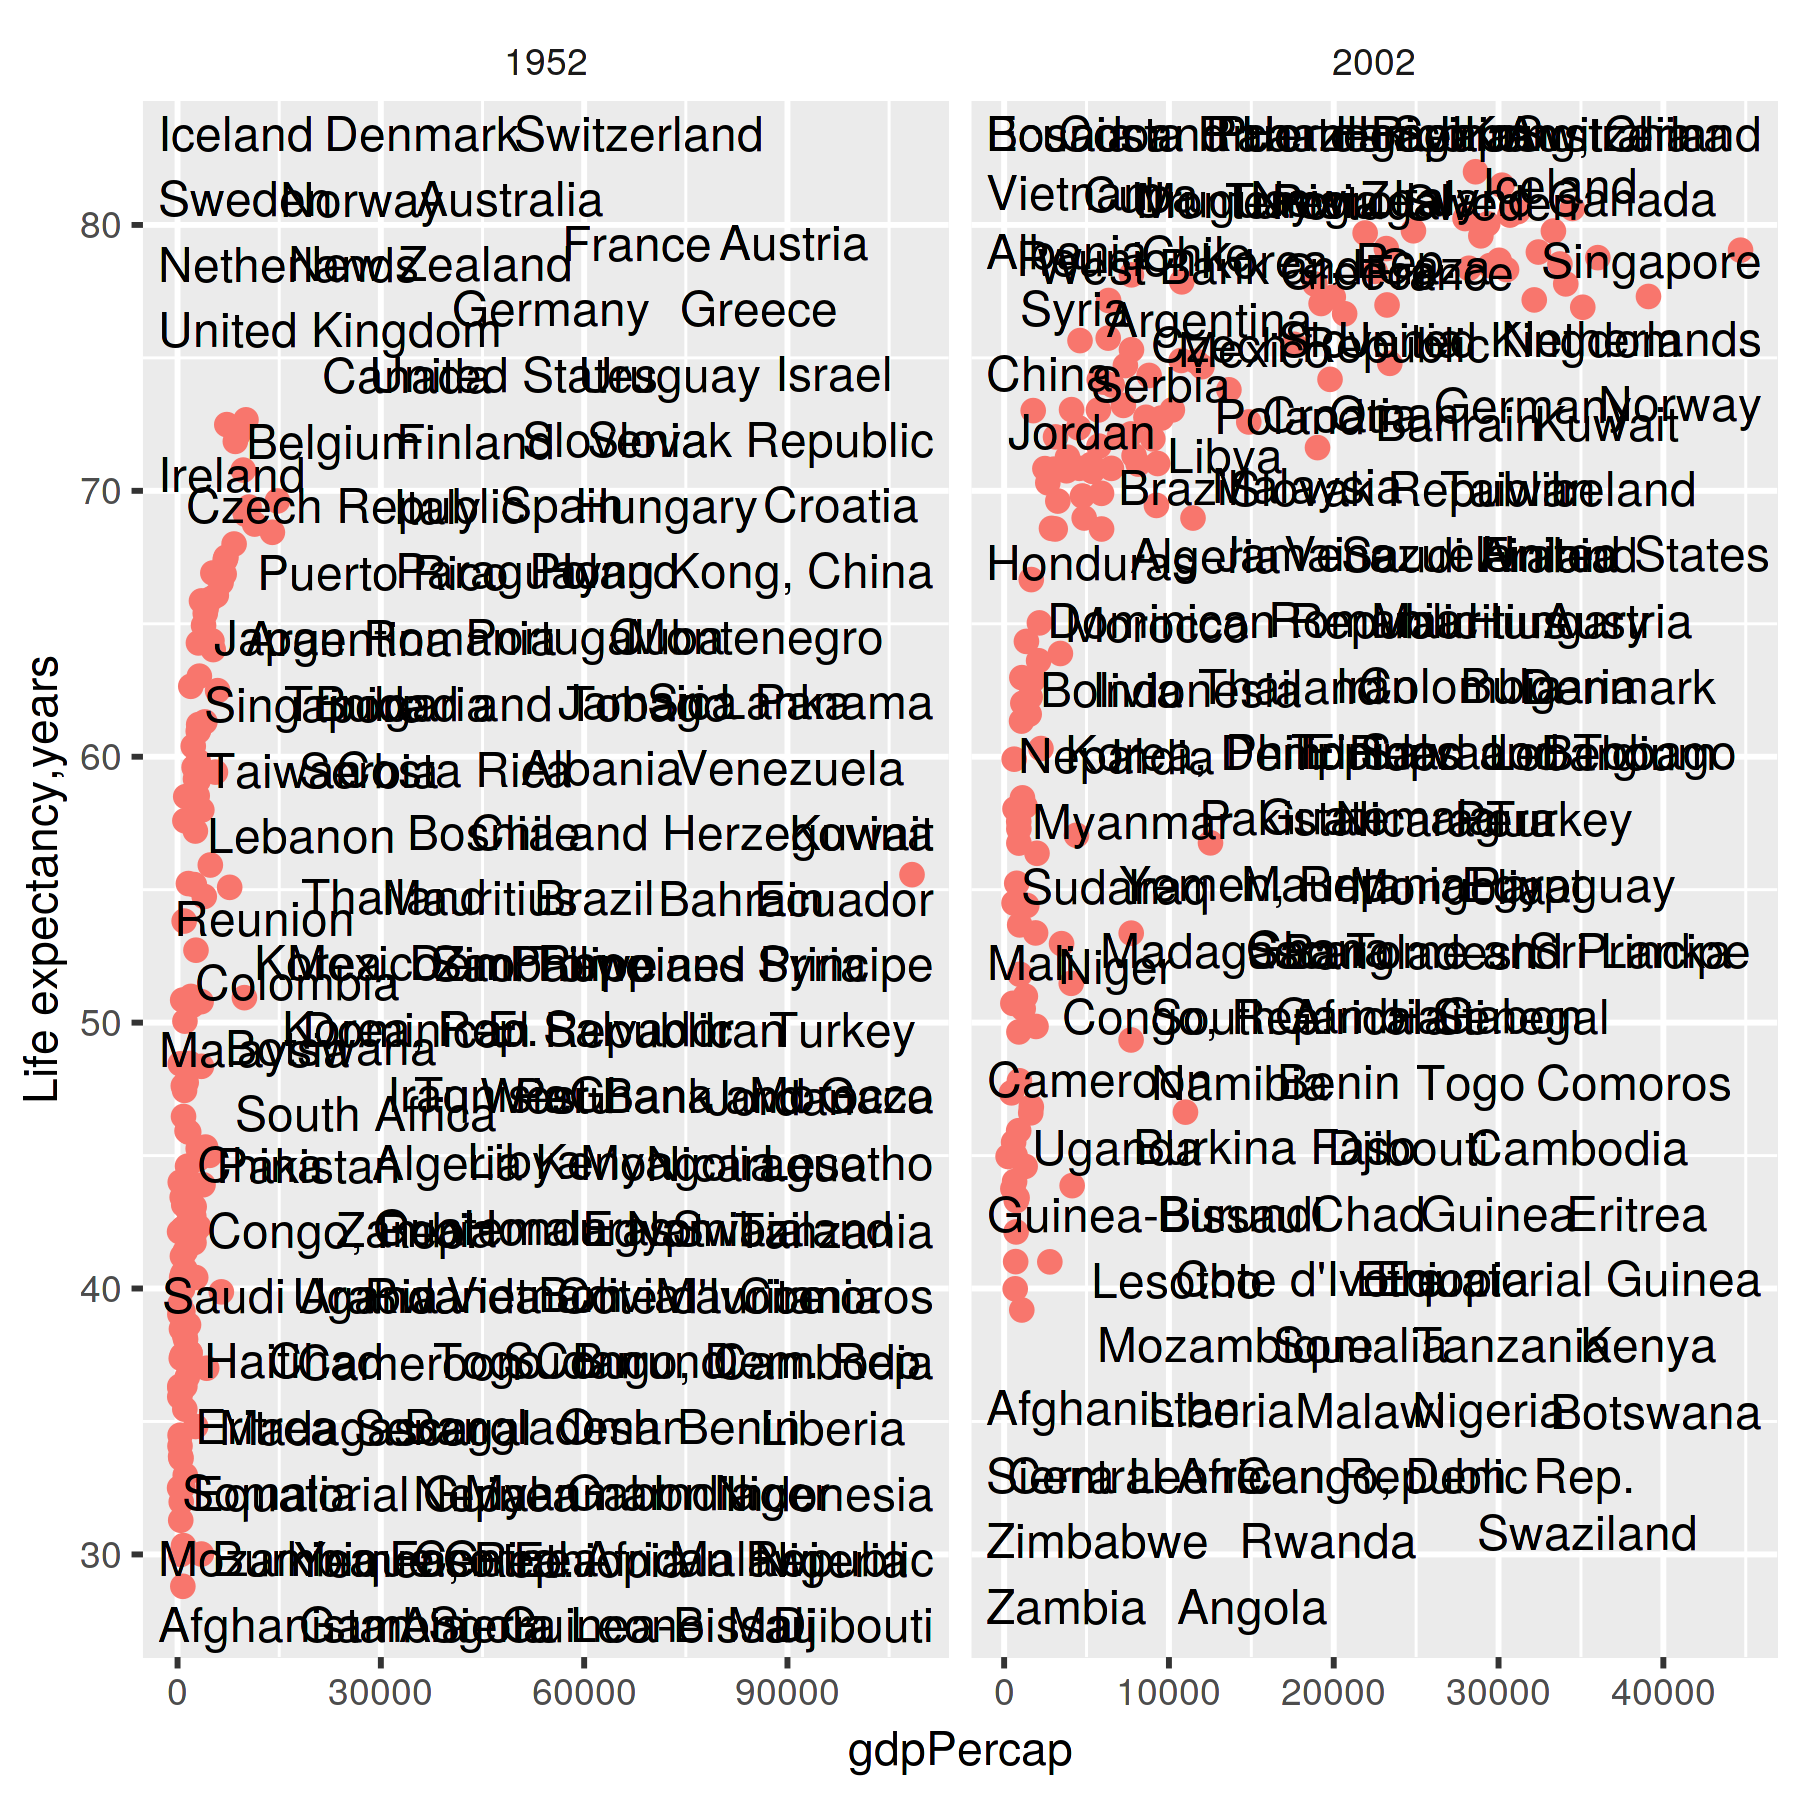

In [28]:
p = ggplot(df.label, aes(x = gdpPercap, y = lifeExp))

p = p + geom_point(aes(size = 'pop',color = 'continent'))

p = p + facet_wrap(~ year, nrow = 1, scales = 'free_x')

p = p + geom_text_repel(data = df.label,
                        segment.color = 'grey20',
                        segment.size = 0,
                        aes(x = gdpPercap, y = lifeExp,label=country), 
                        size = 4,
                        nudge_y = 0.35)

p = p + theme(legend.position = 'none',
              strip.background = element_blank())

p = p + labs(y = 'Life expectancy,years', x = 'gdpPercap')

p

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!